In [63]:
import pandas as pd
#Change path to load
df = pd.read_csv("C:/Users/saan/Downloads/log_course.csv")

In [28]:
# df = df[['angle_of_attack','wind_speed','boat_speed']]

print(df.describe())


       angle_of_attack     wind_speed     boat_speed
count    190035.000000  190035.000000  190035.000000
mean          6.078835      16.348447       5.018843
std         104.631830      12.567037       1.841400
min        -179.998608       4.199198      -0.707480
25%         -84.017745      10.085624       3.989238
50%          11.865631      15.226073       5.564615
75%          97.288387      20.245749       6.406096
max         179.997659     149.000000       8.252760


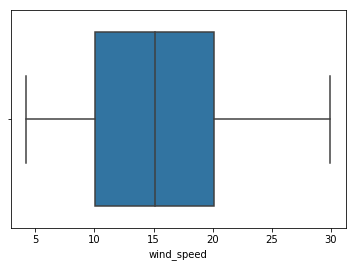

In [71]:
import seaborn as sns
###----------------CLEANING DATA---------------###


#Remove redundant columns
df = df[['angle_of_attack','wind_speed','boat_speed']]

#Get sense of data (expected features, size and types)
# df.head()
# df.describe()
# df.info()

#Check for any missing values
# print('Are there any missing values ?: ', df.isnull().values.any())

#Check for outliers
#--Found irregular windspeeds
sns.boxplot(x=df['wind_speed'])
#--Assuming negative boatspeed means that boat is going backwards
sns.boxplot(x=df['boat_speed'])
sns.boxplot(x=df['angle_of_attack'])

# #Get percentage rows with irregular windspeeds
# print('percentage rows irregular windspeed:', len(df[df['wind_speed'] > 40]) / len(df) * 100)

# #Remove rows with irregular windspeeds
# df = df[df['wind_speed'] < 40]



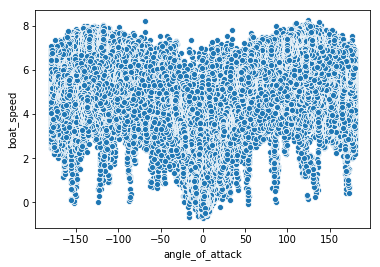

In [94]:
###----------------EXPLORING DATA---------------###
import numpy as np

#Plot histograms and scatterplots
# sns.pairplot(df)

#Plot individual scatterplots
ax = sns.scatterplot(x="angle_of_attack", y="boat_speed", data=df)
# ax = sns.scatterplot(x="wind_speed", y="boat_speed", data=df)

#Find correlation
# df.corr()

# Plot half heatmap
# corr_matrix=df.corr()
# mask = np.zeros_like(corr_matrix)
# mask[np.triu_indices_from(mask)] = True
# plt.figure(3,figsize=(8,8)) 
# with sns.axes_style("white"):
#     p2 = sns.heatmap(corr_matrix, mask=mask, square=True)
#sns.plt.show()




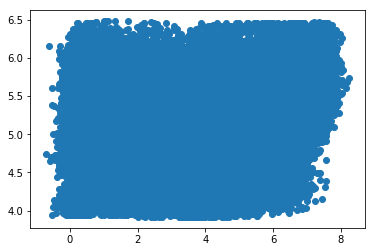

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
###----------------SIMPLE LINEAR REGRESSION---------------###
#Split up data in x an y variables
X = df[['angle_of_attack', 'wind_speed', ]]
y = df['boat_speed']
#Split up in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
#Fit model
lm = LinearRegression()
lm.fit(X_train,y_train)
#Get predictions
predictions = lm.predict(X_test)
#Plot results
plt.scatter(y_test,predictions)

#Distribution seems to be more complex than linear


In [184]:
###----------------POLYNOMIAL REGRESSION---------------###

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Dataframe for results
result = []
results = []

X = np.array(df.angle_of_attack.values.reshape(-1, 1))
y = np.array(df['boat_speed'].values)

lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test,y_test)
    
    print('degree', degree)
    print('RMSE', RMSE)
    print('test_score',test_score)
    result.append(degree,RMSE,test_score)
    results.append(result)
    
#results to csv
results

degree 2
RMSE 323.44374646245257
test_score 0.18210036689771347
degree 3
RMSE 322.6282519742549
test_score 0.18621948689966628
degree 4
RMSE 257.24807163122006
test_score 0.48262343680133246
degree 5
RMSE 256.45099582165534
test_score 0.48582462275070615
degree 6
RMSE 235.47180176745698
test_score 0.5665087760357177


C:\Users\saan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\saan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\saan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\saan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:491: Conv

degree 7
RMSE 235.40876113989054
test_score 0.5667408539365479


C:\Users\saan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\saan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\saan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\saan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:491: Conv

degree 8
RMSE 229.12795030906824
test_score 0.5895515348885589


C:\Users\saan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
